<h2>Importing the libraries</h2>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

<h2>Loading the file</h2>

In [6]:
df = pd.read_csv("data.csv")
df.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


<h3>Analyze the data</h3>

In [14]:
print("The number of rows is: ", df.shape[0], "\nThe number of columns is: ", df.shape[1])

The number of rows is:  50 
The number of columns is:  7


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Mthly_HH_Income           50 non-null     int64 
 1   Mthly_HH_Expense          50 non-null     int64 
 2   No_of_Fly_Members         50 non-null     int64 
 3   Emi_or_Rent_Amt           50 non-null     int64 
 4   Annual_HH_Income          50 non-null     int64 
 5   Highest_Qualified_Member  50 non-null     object
 6   No_of_Earning_Members     50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mthly_HH_Income,50.0,41558.00,26097.908979,5000.0,23550.0,35000.0,50375.0,100000.0
Mthly_HH_Expense,50.0,18818.00,12090.216824,2000.0,10000.0,15500.0,25000.0,50000.0
No_of_Fly_Members,50.0,4.06,1.517382,1.0,3.0,4.0,5.0,7.0
Emi_or_Rent_Amt,50.0,3060.00,6241.434948,0.0,0.0,0.0,3500.0,35000.0
Annual_HH_Income,50.0,490019.04,320135.792123,64200.0,258750.0,447420.0,594720.0,1404000.0
No_of_Earning_Members,50.0,1.46,0.734291,1.0,1.0,1.0,2.0,4.0


In [19]:
df.isnull().any()

Mthly_HH_Income             False
Mthly_HH_Expense            False
No_of_Fly_Members           False
Emi_or_Rent_Amt             False
Annual_HH_Income            False
Highest_Qualified_Member    False
No_of_Earning_Members       False
dtype: bool

**We can interpret that there are no null values in the dataset.**

<h2>Descriptive Statistics</h2>

<h3>Mean</h3>
<body>
<p>    </p>
<li>Mean is a measure of central tendency.</li>
<li>It is considered as the average value.</li>
<li>It is given by total values of the samples divided by the number of samples.</li>
    <li>It is impacted by the outliers.</li>
    </body>

$$
\bar{x} =  \frac{1}{N}\Sigma(xi)
$$

**Example of mean:-**

In [51]:
mean = df['Mthly_HH_Expense'].mean()
print("The mean is", mean)

The mean is 18818.0


In [25]:
#Using a numpy function to find the mean.
np.mean(df['Mthly_HH_Income'])

41558.0

<h3>Median</h3>
<body>
    <p> </p>
    <li>Median is a measure of central tendency.</li>
    <li>It is method to find the middle value.</li>
    <li>One way to compute the median is to list all values in numerical order, and then locate the score in the center of the sample.</li>
    <li>It is like a new, improved mean.</li>
    <li>It describes the central tendency without susceptible to outliers.</li>

**Median when there are even numbers of data points:**

$$
median = \frac{(\frac{n}{2})^{th}term+(\frac{n}{2}+1)^{th}term}{2} 
$$

**Median when there are odd numbers of data points:**

$$
median = (\frac{n+1}{2})^{th}
$$

**Example of median:-**

In [37]:
median = df['Mthly_HH_Expense'].median()
print("The median is:",median)

The median is: 15500.0


<h3>Mode</h3>
<body>
    <p>   </p>
    <li>Mode is the measure of central tendency.</li>
    <li>It is the most frequently occuring value in the set of values.</li>
    <li>A set of observations having two modes is bimodal.</li>
    <li>A set of observations having more than two modes is unimodal</li>
    <p>   </p>
    <head>
        Merits:
        <body>
            <li>It is applicable in both numeric and categorical data</li>
            <li>It is not affected by outliers.</li>
        </body>
        Demerits:
        <body>
            <li>It is not based on all observations.</li>
        </body>
    </head>

**Example of Model:-**

In [50]:
mode = df['Mthly_HH_Expense'].mode()
print("The mode is:",mode[0])

The mode is: 25000


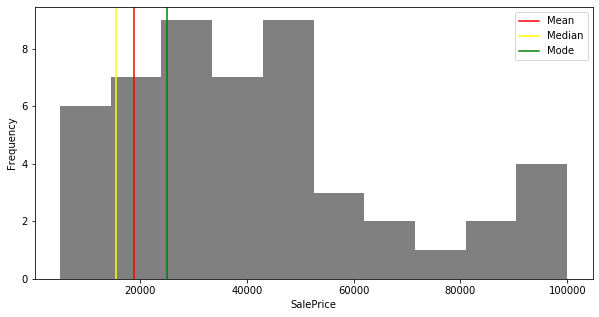

In [56]:
plt.figure(figsize=(10,5))
plt.hist(df['Mthly_HH_Income'], color = 'grey')
plt.axvline(mean,color='red',label='Mean')
plt.axvline(median,color='yellow',label='Median')
plt.axvline(mode[0],color='green',label='Mode')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<h3>Variance</h3>
<body>
    <p>   </p>
    <li> It measures how far a set of numbers is spread out from their average value. </li>
    <li> It is often respresented by &sigma;^2

$$
variance (\sigma^2) = \frac{\Sigma_{i=1}^{N}(\mu_i^2 - x_i^2)}{N}
$$

In [57]:
variance = df['Mthly_HH_Expense'].var()
print("The variance is", variance)

The variance is 146173342.85714287


<h3>Standard Deviation</h3>
<head>
    <body>
        <p>    </p>
        <li>In statistics, Standard deviation is a measure of amount of variation or dispersion of a set of values.</li>
        <li>A low standard deviation denotes that the values tend to be close to the mean of the set, while high standard deviation indicates that values are spread out over a wider range.</li>
    </body></head>

$$
standard.deviation (\sigma) = \sqrt\frac{\Sigma_{i=1}^{N}(\mu_i^2 - x_i^2)}{N}
$$

In [59]:
std = df['Mthly_HH_Expense'].std()
print("The standard deviation is", std)

The standard deviation is 12090.216824240286


<h3>Correlation</h3>
<head>
    <body>
        <p> </p>
        <li>Correlation is the extent of relationship between numeric variables.</li>
        <li>It indicates the extent to which two variables increase or decrease in parallel.</li>
        <li>The value of correlation ranges between -1 and +1.</li>
        <li> Correlation is a normalized form of variance</li>
    </body></head>

$$
Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_x\sigma_y}
$$

<head>
    <li><align = center>&sigma;<sub>x</sub>   is the standard deviation of X
        <li>&sigma;<sub>y</sub>   is the standard deviation of Y</li>
</head>

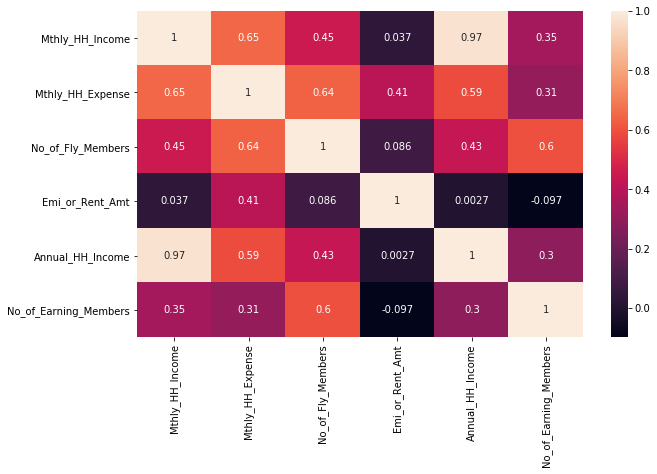

In [79]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

<h3>Normal Distribution</h3>

1. It is the most important distribution
2. The distribution is bell shaped.
3. Also called as the "Gaussian distribution."
4. It is a type of continuous probability distribution for a real-valued random variable.
5. Normal distrbutions are important in statistics and often used in the natural and social sciences to represent real-valued random variable whose distributions are not known.

$$
Notation : X \hookrightarrow  \mathcal{N}(\mu,\,\sigma^{2})
$$

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2}
$$

The parameter μ  is the mean or expectation of the distribution (and also its median and mode), while the parameter σ  is its standard deviation. The variance of the distribution is σ^2

![Normal Distribution](1920px-Standard_deviation_diagram.svg.png "Normal Distribution")

<h3>Features of Normal Distribution</h3>
<p> </p>
<li>The distribution is symmetric about the mean </li>              
<li>For a normal distribution mean = median = mode    </li>
<li>The standard normal distribution has mean 0 and variance 1</li> 
<li> $\mu-\sigma\leq 68\%\leq\mu+\sigma$, Probability score within one standard deviation.</li>
<li> $\mu-2\sigma\leq 95\%\leq\mu+2\sigma$, Probability score within two standard deviation.</li>
<li> $\mu-3\sigma\leq 99.7\%\leq\mu+3\sigma$, Probability score within three standard deviation.</li>

<h3>Skewness</h3>
<p> </p>
<li>Skewness is a lack of symmetry or departure from symmetry </li>
<li>If the distribution of the data is elongated on either side then the data is said to be skewed</li>
<li>If the distribution of the data is elongated on the left side then the data is said to be left skewed.</li> 
<li>If the distribution of the data is elongated on the right side then the data is said to be right skewed</li>

![title](Skewness.jpeg)

<h3>Positively and Negatively Skewed distrbution</h3>
<p> </p>
<p>

    
    1. A "Positively-Skewed" distribution is also known as right-skewed distribution as it's long tails lies in the right side of the distribution.<br>
    a) It has a long right tail<br>
    b) The mean is also on the right side of the peak.<br>
    c) mean > median > mode
    
    
    2. A "Negatively-Skewed" distribution is also known as left-skewed distribution as it's long tails lies in the left side of the distribution.<br>
    a) It has a long left tail<br>
    b) The mean is also on the left side of the peak.<br>
    c) mean < median < mode

### Skewness Formulas 

$$
Pearson's coefficient of Skewness = \frac{3(mean-median)}{N}
$$

$$
Bowley's measure of skewness = \frac{\frac{{{Q}_{3}}+{{Q}_{1}}}{2}-{{Q}_{2}}}{\frac{{{Q}_{3}}-{{Q}_{1}}}{2}}
=\frac{{{Q}_{3}}-2{{Q}_{2}+{{Q}_{1}}}}{{{Q}_{3}}-{{Q}_{1}}}.
$$

<h3>Effect on mean, median and mode due to skewness</h3>
<p> </p>
        
        1. Positively Skewed: mean > median > mode
        2. Normal / No Skew: mean = median = mode
        3. Negatively Skewed: mean > median > mode   

In [93]:
#Karl pearson coefficient of skewness

income_mean = df['Annual_HH_Income'].mean()
income_median = df['Annual_HH_Income'].median()
income_std = df['Annual_HH_Income'].std()

skewness = (3*(income_mean - income_median))/income_std
print("Skewness is",skewness)

Skewness is 0.3991966007696144


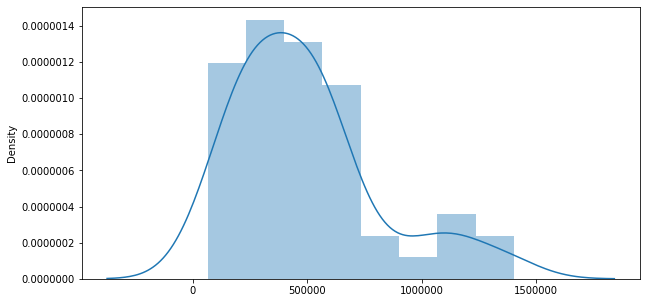

In [101]:
plt.figure(figsize=(10,5))
sns.distplot(df[['Annual_HH_Income']])
plt.show()

<h3>Q-Q Plot(Quartile-Quartile Plot)</h3>

            -> A Q-Q Plot is a scatterplot created by plotting two sets of quantiles against one another.
            -> By a quantile, we mean the fraction of points below the given value.
            -> It is used to check the normality of the data.
            
            Advantages:
            
                1. The sample sizes do not need to be equal. 
                2. Many distributional aspects can be simultaneously tested. 

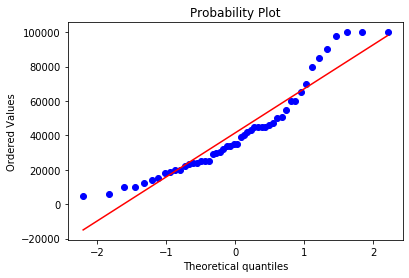

In [104]:
#Testing normality of Mthly_HH_Income
stats.probplot(df['Mthly_HH_Income'], dist = 'norm', plot = plt)
plt.show()

**Interpretation:**   
                    Here the data is not normally distributed, to confirm the data is normally distributed all the point should be on 45 degree angle.

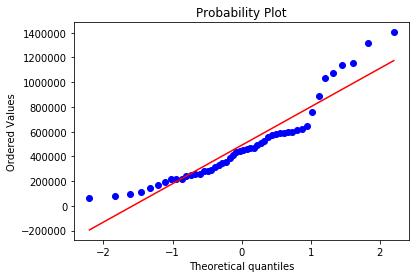

In [106]:
#Testing normality of Mthly_HH_Income
stats.probplot(df['Annual_HH_Income'], dist = 'norm', plot = plt)
plt.show()

<h3>Box-Cox Transformation</h3>

       1. A Box Cox transformation is a transformation of a non-normal dependent variables into a normal shape.
       2. Normality is an important assumption for many statistical techniques; if your data isn't normal,               applying a Box-Cox means that you are able to run a broader number of tests.


$$
T(Y) = \frac{Y^\lambda-1}{\lambda}
$$




        where Y is the response variable and λ is the transformation parameter

**Box-Cox normality plots are formed by:**

    Vertical axis:Correlation coefficient from the normal probability plot after applying Box-Cox transformation
   
    Horizontal axis: Value for λ

In [109]:
x_income,l_income = stats.boxcox(df['Annual_HH_Income'])
print(l_income)

0.24689401204475175


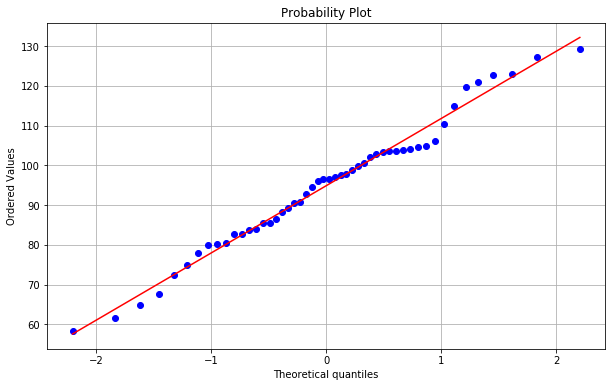

In [111]:
plt.figure(figsize=(10,6))
stats.probplot(x_income, dist='norm', plot=plt)
plt.grid()

In [112]:
# Here, now we can see that the data "Annual_HH_Income" is very much normally distributed than, previous one.